In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive, files
import os

drive.mount('/content/gdrive')

proj_path ='/content/gdrive/MyDrive/project-recommendations/Results' 

#os.listdir(proj_path)
os.chdir(proj_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from ast import literal_eval

In [24]:
df_list = []
file_names = os.listdir()
file_name = []
for file in file_names:
  print(file)
  if 'csv' in file:
    df_list.append(pd.read_csv(file))
    file_name.append(file)
file_names = file_name
topk=[5,10,15,20]

.ipynb_checkpoints
charts
SA2CResultsHM.csv
CELossOnlyHM.csv
SA2CResultsRetailRocket.csv
CELossOnlyResultsRetailRocket.csv


8


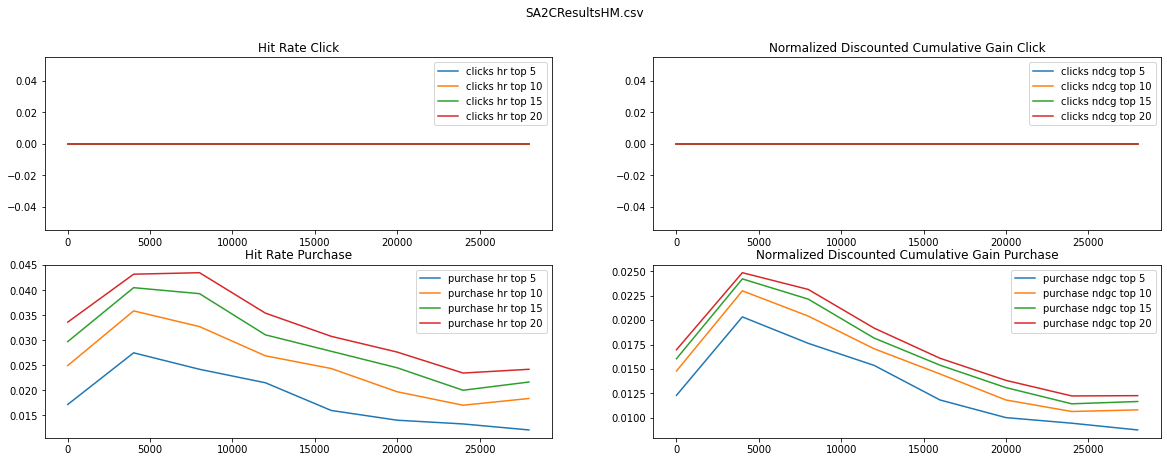

### new iteration ###
SA2CResultsHM.csv
Unnamed: 0                   7.000000
cumulative reward top 0     81.000000
clicks hr top 0              0.000000
clicks ndcg top 0            0.000000
purchase hr top 0            0.012106
purchase ndgc top 0          0.008736
cumulative reward top 1    123.000000
clicks hr top 1              0.000000
clicks ndcg top 1            0.000000
purchase hr top 1            0.018383
purchase ndgc top 1          0.010794
cumulative reward top 2    145.000000
clicks hr top 2              0.000000
clicks ndcg top 2            0.000000
purchase hr top 2            0.021671
purchase ndgc top 2          0.011654
cumulative reward top 3    162.000000
clicks hr top 3              0.000000
clicks ndcg top 3            0.000000
purchase hr top 3            0.024212
purchase ndgc top 3          0.012254
Name: 7, dtype: float64
### end iteration ###
8


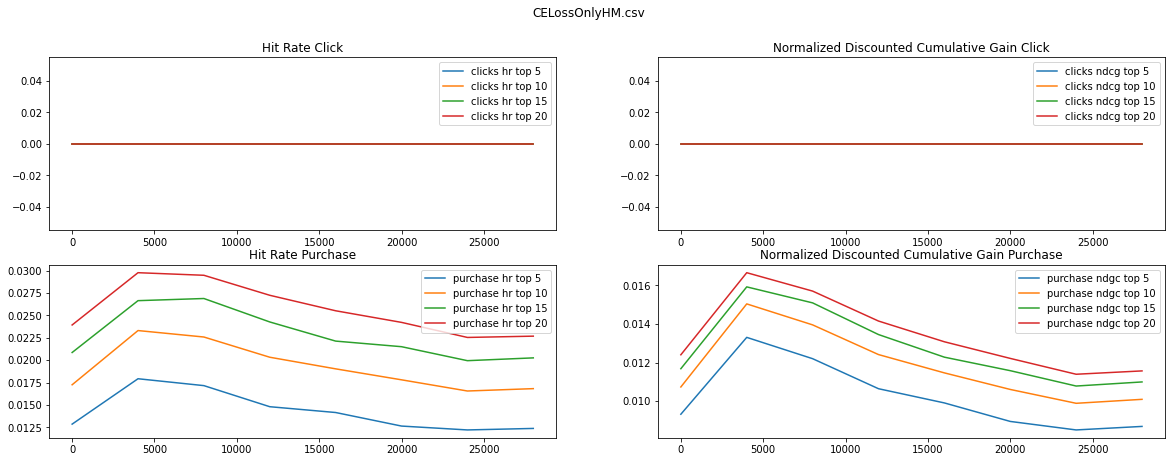

### new iteration ###
CELossOnlyHM.csv
Unnamed: 0                   7.000000
cumulative reward top 0    516.000000
clicks hr top 0              0.000000
clicks ndcg top 0            0.000000
purchase hr top 0            0.012382
purchase ndgc top 0          0.008687
cumulative reward top 1    701.000000
clicks hr top 1              0.000000
clicks ndcg top 1            0.000000
purchase hr top 1            0.016821
purchase ndgc top 1          0.010092
cumulative reward top 2    844.000000
clicks hr top 2              0.000000
clicks ndcg top 2            0.000000
purchase hr top 2            0.020253
purchase ndgc top 2          0.010994
cumulative reward top 3    945.000000
clicks hr top 3              0.000000
clicks ndcg top 3            0.000000
purchase hr top 3            0.022677
purchase ndgc top 3          0.011567
Name: 7, dtype: float64
### end iteration ###
14


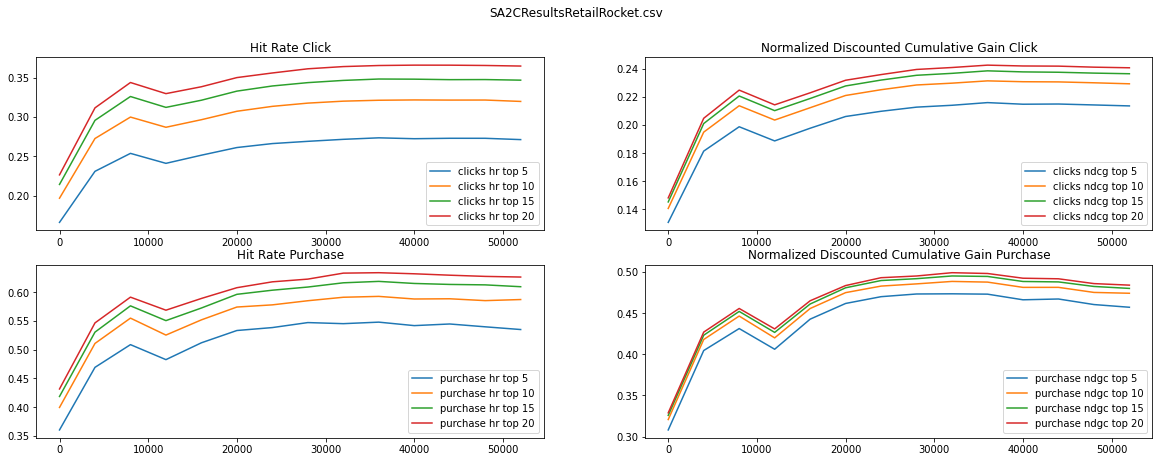

### new iteration ###
SA2CResultsRetailRocket.csv
Unnamed: 0                    13.000000
cumulative reward top 0     9252.200000
clicks hr top 0                0.271381
clicks ndcg top 0              0.213687
purchase hr top 0              0.535060
purchase ndgc top 0            0.457232
cumulative reward top 1    10676.600000
clicks hr top 1                0.319916
clicks ndcg top 1              0.229433
purchase hr top 1              0.587224
purchase ndgc top 1            0.474257
cumulative reward top 2    11434.600000
clicks hr top 2                0.346965
clicks ndcg top 2              0.236598
purchase hr top 2              0.609526
purchase ndgc top 2            0.480155
cumulative reward top 3    11948.000000
clicks hr top 3                0.364901
clicks ndcg top 3              0.240844
purchase hr top 3              0.626347
purchase ndgc top 3            0.484124
Name: 13, dtype: float64
### end iteration ###
15
0           
1     301615
2     378719
3     383928
4       

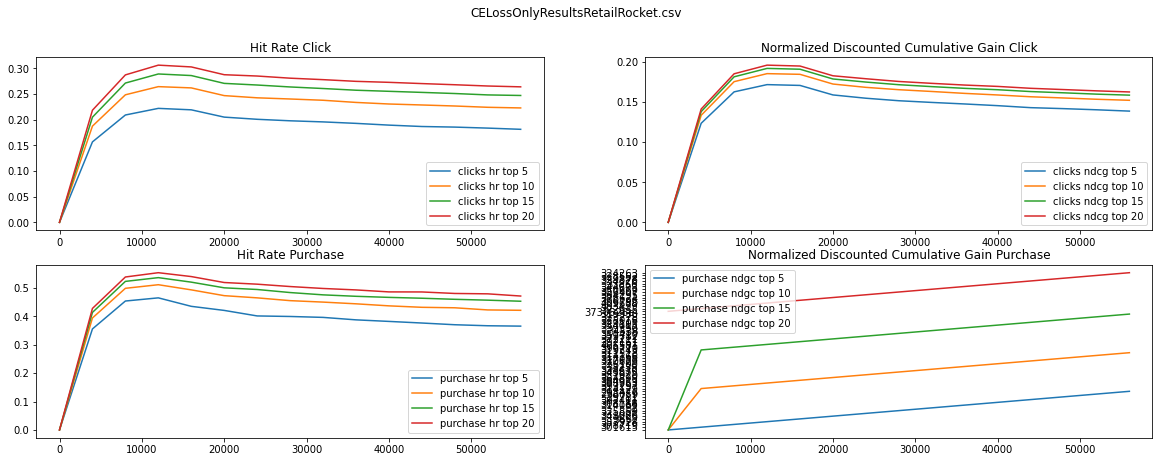

### new iteration ###
CELossOnlyResultsRetailRocket.csv
Unnamed: 0                       14
cumulative reward top 0      6220.2
clicks hr top 0            0.181107
clicks ndcg top 0           0.13861
purchase hr top 0          0.365715
purchase ndgc top 0          293476
cumulative reward top 1      7499.4
clicks hr top 1            0.222702
clicks ndcg top 1          0.152082
purchase hr top 1           0.42147
purchase ndgc top 1          311518
cumulative reward top 2      8242.0
clicks hr top 2            0.246944
clicks ndcg top 2            0.1585
purchase hr top 2          0.453411
purchase ndgc top 2          319930
cumulative reward top 3      8736.4
clicks hr top 3             0.26374
clicks ndcg top 3          0.162474
purchase hr top 3          0.471744
purchase ndgc top 3          324263
Name: 14, dtype: object
### end iteration ###


In [31]:

## Plot each algorithm metrics
for j, df in enumerate(df_list):
  print(len(df.index))
  fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,7))
  ax[0,0].set_title("Hit Rate Click")
  ax[0,1].set_title("Normalized Discounted Cumulative Gain Click")
  ax[1,0].set_title("Hit Rate Purchase")
  ax[1,1].set_title("Normalized Discounted Cumulative Gain Purchase")
  x = [x * 4000 for x in df.index]
  cols = df.columns
  for i, metric in enumerate(['hr', 'nd']):
    local_cols = cols[[metric in col for col in cols]]

    for k, typ in enumerate(['click', 'purchase']):
      local_local_cols = local_cols[[typ in col for col in local_cols]]
      for m, col in enumerate(local_local_cols):
        
        if df[col].dtype == list:
          print(df[col].apply(lambda y: y[2:-2]))
          df[col] = df[col].apply(lambda y: y[2:-2])
        ax[k, i].plot(x, df[col], label=col[:-1] + str(topk[m])) 
      ax[k, i].legend()
  fig.suptitle(file_names[j])

  plt.show()
  fig.savefig('charts/' + file_names[j].split('.')[0] + 'results.png')

  #print results
  print("### new iteration ###")
  print(file_names[j])
  print(df.iloc[-1,:])
  print("### end iteration ###")



  
